In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score

If you take a look at **admissions_data.csv**, you’ll see parameters that admissions officers commonly use to evaluate university applicants. This data is from [Kaggle](https://www.kaggle.com/mohansacharya/graduate-admissions?select=Admission_Predict_Ver1.1.csv) and provides information about 500 applications for various universities and what their chance of admittance is.

This is a regression problem because the probability of being admitted is a continuous label between 0 and 1.

Load the csv file into a DataFrame and investigate the rows and columns to get familiarity with the dataset.

In [2]:
url = "https://raw.githubusercontent.com/lendoo73/Challenge-Project-of-CodeCademy/master/python/Build_Deep_Learning_Models_with_TensorFlow/Deep_Learning_Regression_with_Admissions_Data/admissions_data.csv"
df = pd.read_csv(url)
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
df = df.drop(columns = ["Serial No."])
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


Split it up the data into `feature` parameters and the `labels`.

You are creating a model that predicts an applicant’s likelihood of being admitted to a master’s program, so take some time to look at the features of your model and which column you are trying to predict. Also consider if there are any dataset features that should not be included as a predictor.

Make sure all of your variables are numerical.

If there are any categorical variables, be sure to map them to numerical values, using techniques such as one-hot-encoding, so they can be used in a regression analysis.

In [4]:
labels = df.iloc[:, -1]
labels

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit , Length: 500, dtype: float64

In [5]:
feature = df.iloc[:, : -1]
feature

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [6]:
# there are no categorical variables in this dataset, so do not have to perform one-hot encoding. 


Since you are creating a learning model, you must have a training set and a test set. Remember that this allows you to measure the effectiveness of your model.

You have created two DataFrames: one for `features` DataFrame and one for `labels`. Now, you must split each of these into a training set and a test set.

In [7]:
features_train, features_test, labels_train, labels_test = train_test_split(
    feature, 
    labels, 
    test_size = 0.33,
    random_state = 42
)


If you look through the admissions_data.csv, you may notice that there are many different scales being used. For example, the GRE Score is out of 340 while the University Rating is out of 5. Can you imagine why this might be a problem when using a regression learning model?

You should either scale or normalize your data so that all columns/features have equal weight in the learning model.

In [8]:
numerical_features = feature.select_dtypes(
    include = ['float64', 'int64']
)
numerical_columns = numerical_features.columns

ct = ColumnTransformer(
    [(
        "only numeric", 
        StandardScaler(), 
        numerical_columns 
    )], 
    remainder = "passthrough"
)

features_train_scaled = ct.fit_transform(features_train)
features_test_scaled = ct.transform(features_test)

In [9]:
features_train_norm = pd.DataFrame(
  features_train_scaled, 
  columns = features_train.columns
)
features_train_norm

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,-0.525175,-0.706986,-0.082885,-1.385311,0.538819,-0.835766,-1.144703
1,0.477036,0.276434,1.652517,1.123225,-0.001613,0.363045,-1.144703
2,-0.798505,-1.034792,-0.950586,-0.381897,0.538819,-1.156574,-1.144703
3,0.203706,-0.706986,-0.082885,-0.883604,0.538819,0.295507,0.873589
4,1.297027,1.423757,1.652517,1.624933,1.619684,1.342356,0.873589
...,...,...,...,...,...,...,...
330,1.114806,0.604240,0.784816,1.123225,1.079251,1.004663,0.873589
331,-0.980725,-0.379179,-0.950586,-0.883604,-0.542045,-0.616265,0.873589
332,-1.345165,-1.362599,-1.818287,-1.385311,-1.622910,-2.254077,-1.144703
333,-0.707395,-0.379179,-0.950586,-0.883604,0.538819,-1.528037,-1.144703


Create a neural network model to perform a regression analysis on the admission data.

When designing your own neural network model, consider the following:

* The shape of your input
* Adding hidden layers as well as how many neurons they have
* Including activation functions
* The type of loss function and metrics you use
* The type of gradient descent optimizer you use
* Your learning rate

In [10]:
def design_model(X, learning_rate):
    layers = tf.keras.layers
    Dense = tf.keras.layers.Dense

    model = tf.keras.models.Sequential()
    input = layers.InputLayer(input_shape = (X.shape[1], ))
    model.add(input)
    
    model.add(
        Dense(
            7, 
            activation = "relu" 
        )
    )

    model.add(Dense(1))
    #print(model.summary())

    opt = tf.keras.optimizers.Adam(learning_rate = learning_rate)
    model.compile(
        loss = "mse",  
        metrics = ["mae"], 
        optimizer = opt
    )

    return model

def fit_model(features_train, labels_train, learning_rate, num_epochs):
    model = design_model(features_train, learning_rate)
    stop = tf.keras.callbacks.EarlyStopping(
        monitor = "val_loss", 
        mode = "min",
        verbose = 1, 
        patience = 40 
    )
    history = model.fit(
        features_train,
        labels_train,
        epochs = num_epochs,
        batch_size = 16,
        verbose = 0,
        validation_split = 0.2,        #  20% of the data would be allocated for validation
        callbacks = [stop]
    )
    return history

It’s time to test out the model you created!

Fit your model with your training set and test it out with your test set.

It’s okay if it is not that accurate right now. You can play around with your model and tweak it to increase its accuracy.

In [11]:
learning_rate = 0.01
num_epochs = 1000
history = fit_model(features_train_scaled, labels_train, learning_rate, num_epochs)
for property, value in vars(history).items():
    #print(property, ":", value)
    pass

Epoch 00091: early stopping


In [12]:
val_mse, val_mae = history.model.evaluate(
  features_test, 
  labels_test, 
  verbose = 0
)

print("MAE: ", val_mae)

MAE:  1.854364037513733


In [13]:
print(history.history.keys())

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


You have tested out your model. Now is the time to adjust your model’s hyperparameters. You have a lot of choices to make. You can choose:

* the number of `epochs`
* the size of your `batch_size`
* to add more hidden layers
* your type of optimizer and/or activation functions.

Have fun in the hyperparameter playground. Test things out and see what works and what does not work. See what makes your model optimized between speed and accuracy. You have complete creative power!

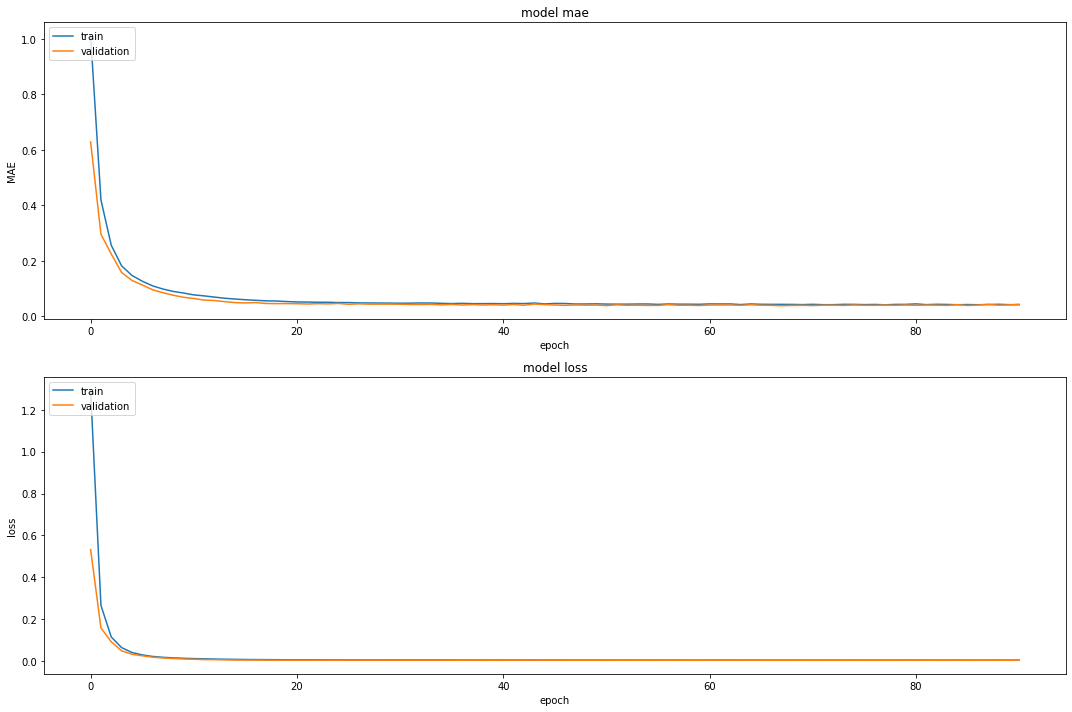

In [14]:
fig = plt.figure(figsize = (15,10))
ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(history.history['mae'])
ax1.plot(history.history['val_mae'])
ax1.set_title('model mae')
ax1.set_ylabel('MAE')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'validation'], loc='upper left')
 
  # Plot loss and val_loss over each epoch
ax2 = fig.add_subplot(2, 1, 2)
ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('model loss')
ax2.set_ylabel('loss')
ax2.set_xlabel('epoch')
ax2.legend(['train', 'validation'], loc='upper left')
 
# used to keep plots from overlapping each other  
fig.tight_layout()